# Proyecto final
### Tercera entrega

In [2]:
# Librerías

# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

#Regresión logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Grid Search
from sklearn.model_selection import GridSearchCV

# Estilo de los gráficos
sns.set()

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Se levanta y limpia el dataset

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('startup_data.csv')
#borramos columnas innecesarias
df.drop( ['Unnamed: 6', 'state_code.1', 'id', 'zip_code', 'object_id'], axis = 1, inplace = True)
df.pop('Unnamed: 0')
df

,state_code,latitude,longitude,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,San Francisco,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,Burlington,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,Sunnyvale,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,San Francisco,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,acquired


# PCA
En esta seccion se aplica PCA. Como ya hemos destinado un notebook a este proceso, no vamos a detenernos mucho en la explicación. Repetimos el proceso para comparar luego los resultados con y sin Análisis de Componentes Principales.

In [4]:
#Selección de columnas donde se aplicará PCA y creación de un df nuevo para el proceso
df_ACP = df[['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 
            'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 
            'milestones', 'avg_participants']]
#borramos aquellas filas de edades con números negativos
df_ACP = df_ACP.drop(df_ACP[(df_ACP['age_first_funding_year']<0) | (df_ACP['age_last_funding_year']<0) |
(df_ACP['age_first_milestone_year']<0) | (df_ACP['age_last_milestone_year']<0)].index)
#Eliminamos NAs
df_ACP = df_ACP.dropna() # Elimina NAs
df_ACP.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1.0000
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,4.7500
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,4.0000
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,3.3333
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1.0000


In [5]:
# Inicilización del scaler
scaler = StandardScaler()
# Fit Transform
df_ACP[df_ACP.columns] = scaler.fit_transform(df_ACP[df_ACP.columns]) # df con los datos normalizados
df_ACP.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
0,0.027985,-0.349364,0.459388,0.552725,-0.764592,0.438626,-0.128624,0.706282,-0.987782
1,1.290448,2.099689,1.296209,0.649432,0.045387,1.155253,0.053828,-1.052473,0.953423
2,-0.505842,-1.039060,-0.690390,-0.890698,-0.494599,-0.994630,-0.118405,-0.173096,0.565182
3,0.415146,0.460288,0.937131,0.327673,-0.494599,0.438626,0.053369,-1.052473,0.220062
4,-0.959139,-0.816514,-1.198534,-1.586034,-0.899588,-0.278002,-0.124376,-1.052473,-0.987782


In [6]:
# Inicilización del scaler
pca = PCA(random_state=42) # Valor semilla
# Fit
pca.fit(df_ACP)
pca.components_.round(2)

array([[ 0.39,  0.51,  0.51,  0.49,  0.18,  0.21,  0.09,  0.03,  0.06],
       [-0.42, -0.12, -0.1 ,  0.13,  0.54,  0.4 ,  0.08,  0.57,  0.07],
       [-0.01,  0.07, -0.14, -0.18, -0.04,  0.16,  0.75, -0.22,  0.56],
       [-0.11,  0.1 , -0.02, -0.08, -0.07,  0.3 ,  0.45, -0.15, -0.8 ],
       [ 0.14, -0.27,  0.08,  0.24,  0.11, -0.69,  0.47,  0.34, -0.15],
       [-0.08, -0.14,  0.24, -0.17,  0.73, -0.18, -0.04, -0.56, -0.04],
       [ 0.57,  0.33, -0.46, -0.42,  0.34, -0.05, -0.04,  0.23, -0.1 ],
       [-0.17,  0.24, -0.64,  0.61,  0.1 , -0.15, -0.03, -0.31, -0.02],
       [-0.53,  0.68,  0.16, -0.27, -0.04, -0.38,  0.01,  0.14,  0.01]])

In [7]:
#Se indica el ratio de varianza explicada por cada componente (la sumatoria será igual a 1)
pca.explained_variance_ratio_.round(2) 

array([0.35, 0.21, 0.11, 0.11, 0.09, 0.06, 0.04, 0.01, 0.01])

In [8]:
#Varianza acumulada por las componentes
var_acum = np.cumsum(pca.explained_variance_ratio_)
var_acum #los 5 primeros componentes principales explican un 88% de la varianza

array([0.3504927 , 0.56545424, 0.67953086, 0.78899565, 0.88321839,
       0.9411974 , 0.97968284, 0.99179013, 1.        ])

In [9]:
#Se crea un nuevo dataset con 5 componentes

# Inicializo el incrementalPCA para la cantidad de componentes seleccionada
acp_final = IncrementalPCA(n_components=5)

# Fit y Transform de los datos al nuevo espacio vectorial  
acp_proy = acp_final.fit_transform(df_ACP)

# Convierto en el array acp_proy en df
df_ACP_proy = pd.DataFrame(acp_proy, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],)
df_ACP_proy.head()

,PC1,PC2,PC3,PC4,PC5
0,0.244050,0.142415,-0.992519,-0.595970,-0.326938
1,2.829196,-0.876135,0.871385,0.152267,1.387119
2,-1.795622,-0.441477,0.382530,0.674612,-0.364798
3,1.019758,-0.952211,0.322748,-0.159247,0.625074
4,-2.504100,-0.857083,-0.122397,-1.040674,0.604026


# Regresión Logística
### A partir de esta sección implementaremos el algorítmo de regresión logística sin PCA.

In [10]:
#Se crea un dataframe que contenga sólo las columnas a analizar 
data = df[['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 
            'is_mobile', 'is_enterprise','is_advertising', 'is_gamesvideo', 'is_ecommerce',
             'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 
             'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_top500', 'labels']]
#Se define labels como la variable target
X = data.drop(['labels'], axis = 1)
y = data[['labels']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
#Iniciamos el modelo:
logreg = LogisticRegression()

In [13]:
#Definimos los parámetros para GridSearch:
param_grid = [{'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']}]

In [14]:
gs = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
maxef = gs.fit(X_train, y_train)
"Máxima efectividad: %f usando %s" % (maxef.best_score_, maxef.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


"Máxima efectividad: 0.710530 usando {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}"

In [17]:
new_logreg = LogisticRegression(C = 0.1, penalty = 'l2', solver ='newton-cg')
new_logreg.fit(X_train,y_train)

#Analizamos el desempenio del modelo
y_pred = new_logreg.predict(X_test)
from sklearn.metrics import accuracy_score
Desempenio = accuracy_score(y_test, y_pred)
Desempenio

0.7111913357400722

El modelo no tuvo un buen porcentaje de aciertos. A continuacion, vamos a evaluarlo otra vez tras aplicar una matriz de confusion y ver cuantos falsos positivos arroja.

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 38,  62],
       [ 18, 159]], dtype=int64)

Text(0.5, 257.44, 'Prediccion')

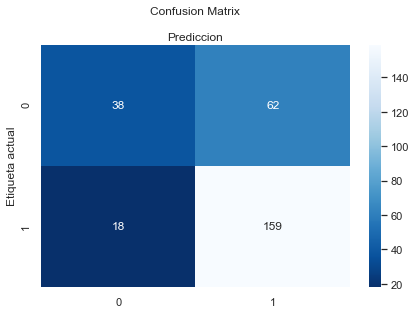

In [19]:
#Visualizamos los resultados de la matriz de confusión:
class_name = [0, 1] #0: closed, 1: acquired
fig, ax = plt.subplots()
tick = np.arange(len(class_name))
plt.xticks(tick, class_name)
plt.yticks(tick, class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Prediccion')

### El modelo no tiene un gran porcentaje de aciertos. Tras evaluar su desempeño en la matriz de confusion, descubrimos que tiene bastantes falsos positivos (siendo la 2da categoria mas comun) lo que es preocupante ya que el peor escenario posible es que el modelo diagnostique como verdadero (o, en este contexto, como exitoso) un caso que es falso (que fracasa).

In [20]:
#Creamos un df con las variables que aplicaremos. No se utilizaran todos los componentes principales
#porque las filas relacionadas con la edad tienen datos erroneos e incompletos.
dataPCA = df[['relationships', 'funding_rounds', 'labels']]
#Se define labels como la variable target
X = dataPCA.drop(['labels'], axis = 1)
y = dataPCA[['labels']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
logreg = LogisticRegression()
#Definimos los parámetros para GridSearch:
param_grid_PCA = [{'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']}]
PCA_gs = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
maxef_PCA = gs.fit(X_train, y_train)
"Máxima efectividad: %f usando %s" % (maxef_PCA.best_score_, maxef.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


"Máxima efectividad: 0.763164 usando {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}"

In [25]:
PCA_new_logreg = LogisticRegression(C = 0.1, penalty = 'l2', solver ='newton-cg')
PCA_new_logreg.fit(X_train, y_train)

#Analizamos el desempenio del modelo
y_pred = PCA_new_logreg.predict(X_test)
from sklearn.metrics import accuracy_score
Desempenio_PCA = accuracy_score(y_test, y_pred)
Desempenio_PCA

0.7545126353790613

### Tras aplicar PCA, hubo una mejora en el porcentaje de aciertos, que consideramos aún insuficiente. Vamos a analizar, mediante la aplicación de otra matriz de confusión, si mejoró en cuanto a los falsos positivos.

In [132]:
PCA_cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
PCA_cnf_matrix

array([[ 60,  40],
       [ 28, 149]], dtype=int64)

Text(0.5, 257.44, 'Prediccion')

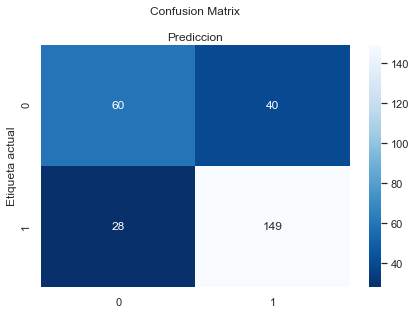

In [131]:
class_name = [0, 1] #0: closed, 1: acquired
fig, ax = plt.subplots()
tick = np.arange(len(class_name))
plt.xticks(tick, class_name)
plt.yticks(tick, class_name)
sns.heatmap(pd.DataFrame(PCA_cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Prediccion')

### Tras aplicar la matriz de confusion, el modelo mejoro levemente su performance en cuanto a falsos positivos, pero sigue sin ser un buen resultado. Teniendo en cuenta el accuracy score y que en este caso debió analizar muchos menos datos, el modelo no parece ser el ideal para nuestro dataset.